In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#we are dropping CustomerID as it is unneccesary
df = df.drop('CustomerID', axis=1)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df=df.rename(columns={"Gender":"gender","Age":"age","Annual Income (k$)":"income","Spending Score (1-100)":"score"})

In [7]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.shape

(200, 4)

In [9]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
df['gender'].value_counts()

gender
Female    112
Male       88
Name: count, dtype: int64

In [11]:
df.isnull().sum()

gender    0
age       0
income    0
score     0
dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
ohe = OneHotEncoder(sparse_output=False)

In [14]:
gender_ohe = ohe.fit_transform(df[['gender']])

In [15]:
gender_ohe

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [16]:
df.drop(columns="gender", inplace=True)

In [17]:
combined_values = np.hstack((gender_ohe,df[['age', 'income','score']].values))

In [18]:
combined_values

array([[  0.,   1.,  19.,  15.,  39.],
       [  0.,   1.,  21.,  15.,  81.],
       [  1.,   0.,  20.,  16.,   6.],
       [  1.,   0.,  23.,  16.,  77.],
       [  1.,   0.,  31.,  17.,  40.],
       [  1.,   0.,  22.,  17.,  76.],
       [  1.,   0.,  35.,  18.,   6.],
       [  1.,   0.,  23.,  18.,  94.],
       [  0.,   1.,  64.,  19.,   3.],
       [  1.,   0.,  30.,  19.,  72.],
       [  0.,   1.,  67.,  19.,  14.],
       [  1.,   0.,  35.,  19.,  99.],
       [  1.,   0.,  58.,  20.,  15.],
       [  1.,   0.,  24.,  20.,  77.],
       [  0.,   1.,  37.,  20.,  13.],
       [  0.,   1.,  22.,  20.,  79.],
       [  1.,   0.,  35.,  21.,  35.],
       [  0.,   1.,  20.,  21.,  66.],
       [  0.,   1.,  52.,  23.,  29.],
       [  1.,   0.,  35.,  23.,  98.],
       [  0.,   1.,  35.,  24.,  35.],
       [  0.,   1.,  25.,  24.,  73.],
       [  1.,   0.,  46.,  25.,   5.],
       [  0.,   1.,  31.,  25.,  73.],
       [  1.,   0.,  54.,  28.,  14.],
       [  0.,   1.,  29.,

In [19]:
encoded_column_names = ohe.get_feature_names_out(['gender'])
columns = list(encoded_column_names) + ['age', 'income','score']

In [20]:
columns

['gender_Female', 'gender_Male', 'age', 'income', 'score']

In [21]:
combined_df = pd.DataFrame(combined_values, columns=columns)
combined_df

,gender_Female,gender_Male,age,income,score
0,0.0,1.0,19.0,15.0,39.0
1,0.0,1.0,21.0,15.0,81.0
2,1.0,0.0,20.0,16.0,6.0
3,1.0,0.0,23.0,16.0,77.0
4,1.0,0.0,31.0,17.0,40.0
...,...,...,...,...,...
195,1.0,0.0,35.0,120.0,79.0
196,1.0,0.0,45.0,126.0,28.0
197,0.0,1.0,32.0,126.0,74.0
198,0.0,1.0,32.0,137.0,18.0


In [22]:
combined_df.shape

(200, 5)

In [23]:
combined_df.describe()

,gender_Female,gender_Male,age,income,score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.560000,0.440000,38.850000,60.560000,50.200000
std,0.497633,0.497633,13.969007,26.264721,25.823522
min,0.000000,0.000000,18.000000,15.000000,1.000000
25%,0.000000,0.000000,28.750000,41.500000,34.750000
50%,1.000000,0.000000,36.000000,61.500000,50.000000
75%,1.000000,1.000000,49.000000,78.000000,73.000000
max,1.000000,1.000000,70.000000,137.000000,99.000000


In [24]:
df1 = combined_df.copy()
df2 = combined_df.copy()

<h1>Visualization</h1>


c:\Users\AFZAAL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


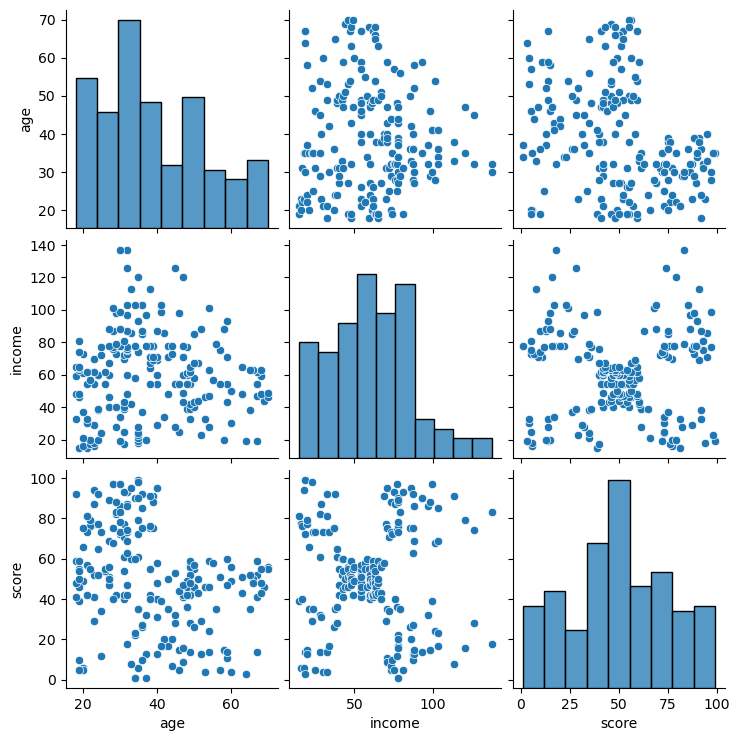

In [25]:
sns.pairplot(df[['age','income','score']])

Text(0.5, 1.0, 'Age and Score plot')

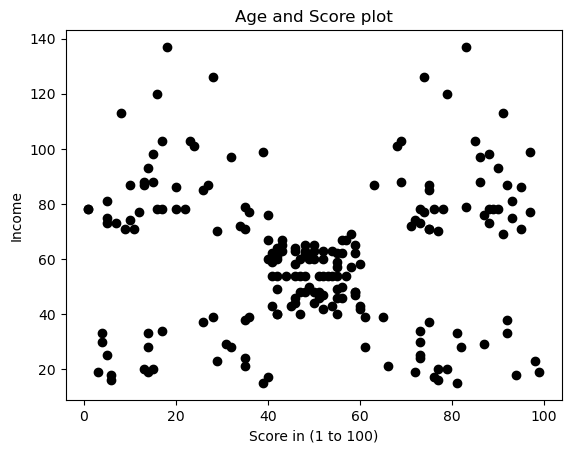

In [26]:
#income and score
plt.scatter(df.score , df.income, color='black')
plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

<h1>K-Means Cluster</h1>


In [27]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

In [28]:
km = KMeans(n_clusters=8)

In [30]:

km.fit(combined_df[['income','score']])

c:\Users\AFZAAL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AFZAAL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans()

In [31]:
df['new_clusters'] =  km.predict(df[['income','score']])
df.head()

,age,income,score,new_clusters
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [32]:
df.tail()

,age,income,score,new_clusters
195,35,120,79,0
196,45,126,28,6
197,32,126,74,0
198,32,137,18,6
199,30,137,83,0


<h1>Visualization</h1>

In [35]:
df0 = df[df.new_clusters == 0]
df1 = df[df.new_clusters == 1]
df2 = df[df.new_clusters == 2]
df3 = df[df.new_clusters == 3]
df4 = df[df.new_clusters == 4]
df5 = df[df.new_clusters == 5]
df6 = df[df.new_clusters == 6]
df7 = df[df.new_clusters == 7]

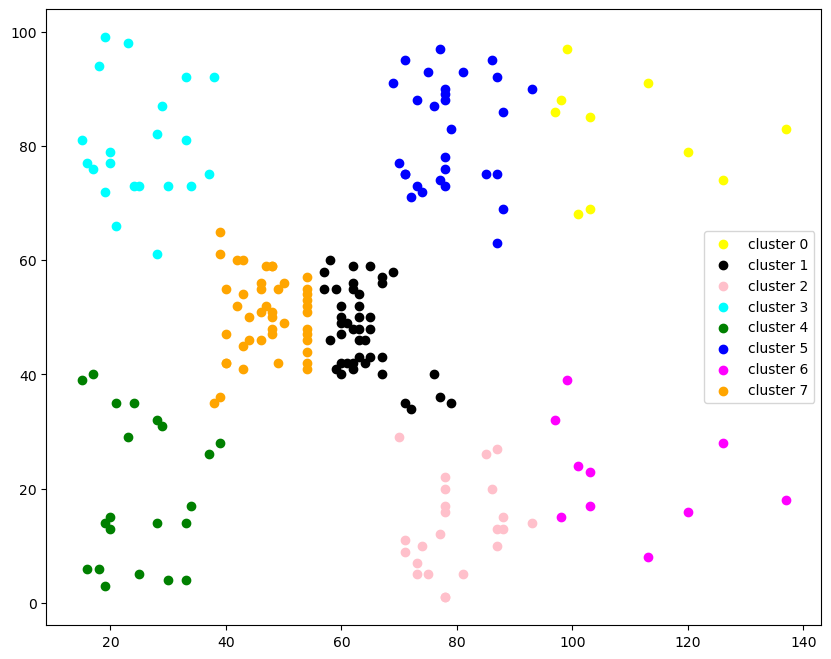

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(df0.income, df0.score, color='yellow', label='cluster 0')
plt.scatter(df1.income, df1.score, color='black', label='cluster 1')
plt.scatter(df2.income, df2.score, color='pink', label='cluster 2')
plt.scatter(df3.income, df3.score, color='cyan', label='cluster 3')
plt.scatter(df4.income, df4.score, color='green', label='cluster 4')
plt.scatter(df5.income, df5.score, color='blue', label='cluster 5')
plt.scatter(df6.income, df6.score, color='magenta', label='cluster 6')
plt.scatter(df7.income, df7.score, color='orange', label='cluster 7')

plt.legend()
plt.show()

In [37]:
cen1 = km.cluster_centers_
cen1

array([[109.7       ,  82.        ],
       [ 63.80952381,  47.66666667],
       [ 79.73913043,  13.39130435],
       [ 25.0952381 ,  80.04761905],
       [ 25.14285714,  19.52380952],
       [ 78.55172414,  82.17241379],
       [109.7       ,  22.        ],
       [ 47.06818182,  50.36363636]])

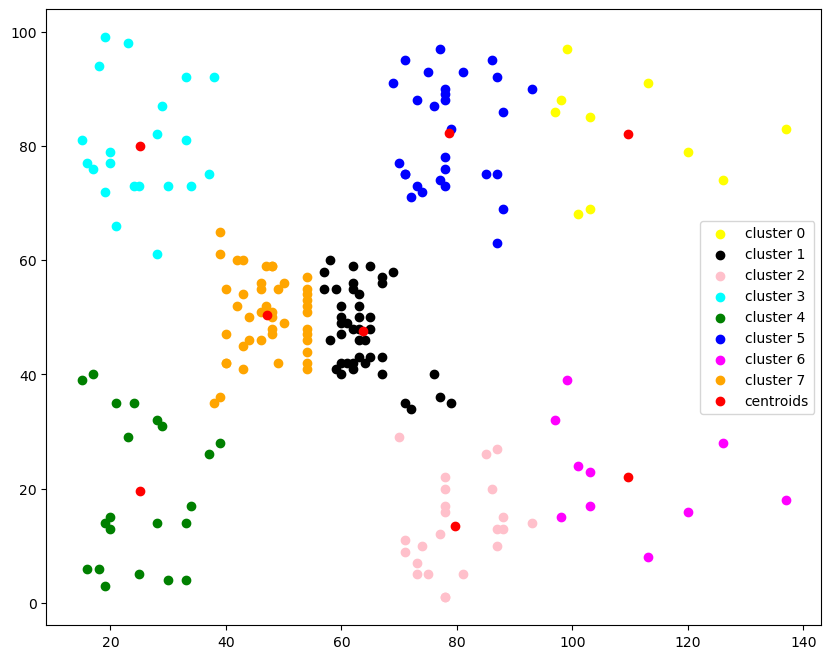

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(df0.income, df0.score, color='yellow', label='cluster 0')
plt.scatter(df1.income, df1.score, color='black', label='cluster 1')
plt.scatter(df2.income, df2.score, color='pink', label='cluster 2')
plt.scatter(df3.income, df3.score, color='cyan', label='cluster 3')
plt.scatter(df4.income, df4.score, color='green', label='cluster 4')
plt.scatter(df5.income, df5.score, color='blue', label='cluster 5')
plt.scatter(df6.income, df6.score, color='magenta', label='cluster 6')
plt.scatter(df7.income, df7.score, color='orange', label='cluster 7')

plt.scatter(cen1[:,0] , cen1[:,1], color='red', label='centroids')

plt.legend()
plt.show()

<h1>Optimizing K Means</h1>

In [39]:
wcss = []
cluster_range = range(1,15)
for k in cluster_range:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['income','score']])
    wcss.append(km2.inertia_)

c:\Users\AFZAAL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AFZAAL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\AFZAAL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AFZAAL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

In [40]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37271.88623658949,
 30259.65720728547,
 25018.576334776335,
 21830.041978049438,
 19664.685196005543,
 17595.28888108518,
 16395.603499278495,
 14457.154816336162,
 12822.326051889288]

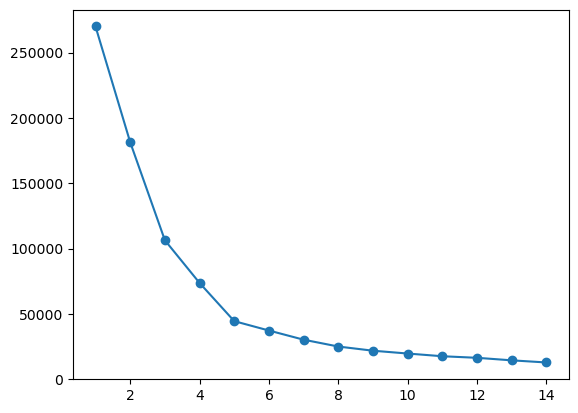

In [41]:
plt.plot(cluster_range, wcss,marker='o')

In [43]:
!pip install kneed
from kneed import KneeLocator

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [44]:
kn = KneeLocator(cluster_range, wcss, direction='decreasing', curve='convex')

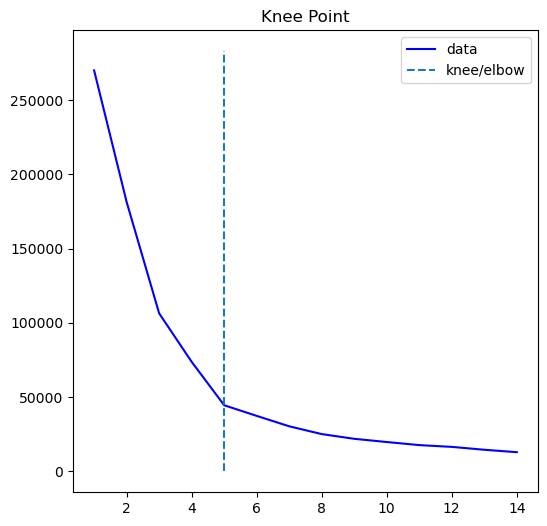

In [45]:
kn.plot_knee()

<h1> After Elbow </h1>

In [47]:
km = KMeans(n_clusters=5)

In [48]:
df['new_clusters'] = km.fit_predict(combined_df[['income','score']])

c:\Users\AFZAAL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AFZAAL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [49]:
cen2 = km.cluster_centers_
cen2

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

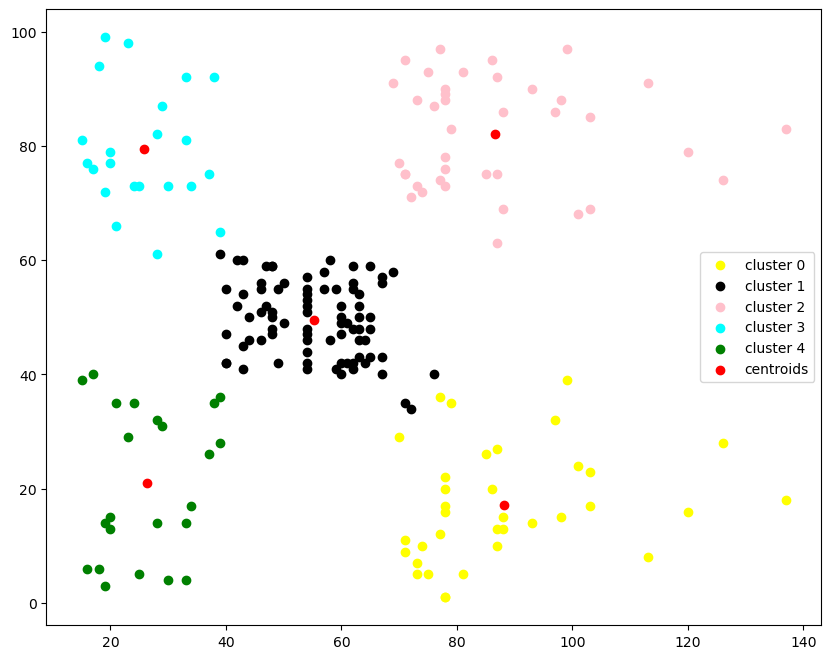

In [50]:
df0 = df[df.new_clusters == 0]
df1 = df[df.new_clusters == 1]
df2 = df[df.new_clusters == 2]
df3 = df[df.new_clusters == 3]
df4 = df[df.new_clusters == 4]

plt.figure(figsize=(10,8))
plt.scatter(df0.income, df0.score, color='yellow', label='cluster 0')
plt.scatter(df1.income, df1.score, color='black', label='cluster 1')
plt.scatter(df2.income, df2.score, color='pink', label='cluster 2')
plt.scatter(df3.income, df3.score, color='cyan', label='cluster 3')
plt.scatter(df4.income, df4.score, color='green', label='cluster 4')

plt.scatter(cen2[:,0] , cen2[:,1], color='red', label='centroids')

plt.legend()
plt.show()

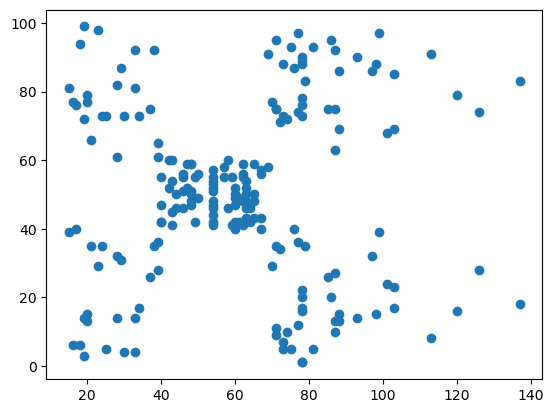

In [51]:
plt.scatter(df.income, df.score)

In [52]:
km.predict([[18, 40]])

c:\Users\AFZAAL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])